<a href="https://colab.research.google.com/github/LennyRBriones/object_detection/blob/main/object_detection_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating a sliding window

getting an specific version to avoid incompatibility

In [1]:
!pip install opencv-python-headless==4.7.0.72

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

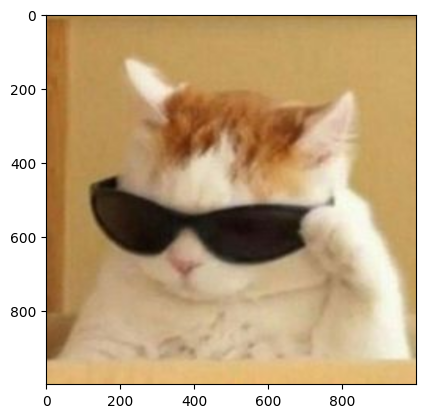

In [3]:
np_image = cv2.imread("/content/drive/MyDrive/Object detection practices/michi.jpg") #read the image
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB) # color order to rgb
np_image = cv2.resize(np_image, dsize=(1000, 1000))
plt.imshow(np_image)

In [4]:
def sliding_window(image, step, ws):
  for y in range(0, image.shape[0] -ws[1]+1, step): # range oh the image in 1 +1 to borders
    for x in range(0, image.shape[1] -ws[0]+1, step): # the same in the x layer
      yield (x, y, image[y:y + ws[1], x:x +ws[0]]) # generator of the windows

In [5]:
windows = sliding_window(np_image, 200, (200, 200))

In [6]:
os.makedirs("sliding_window") #making the directory

<ipython-input-7-94ef6c4ed4f3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(1, 2, figsize=(12, 12))


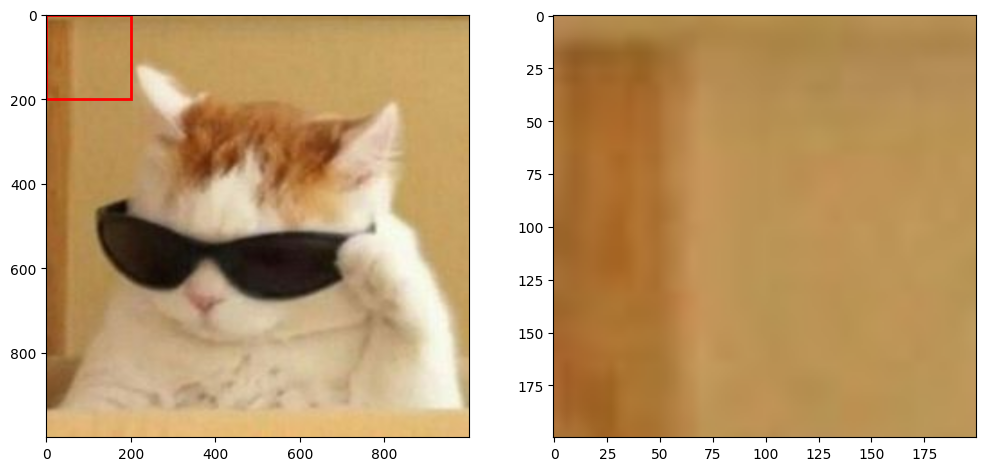

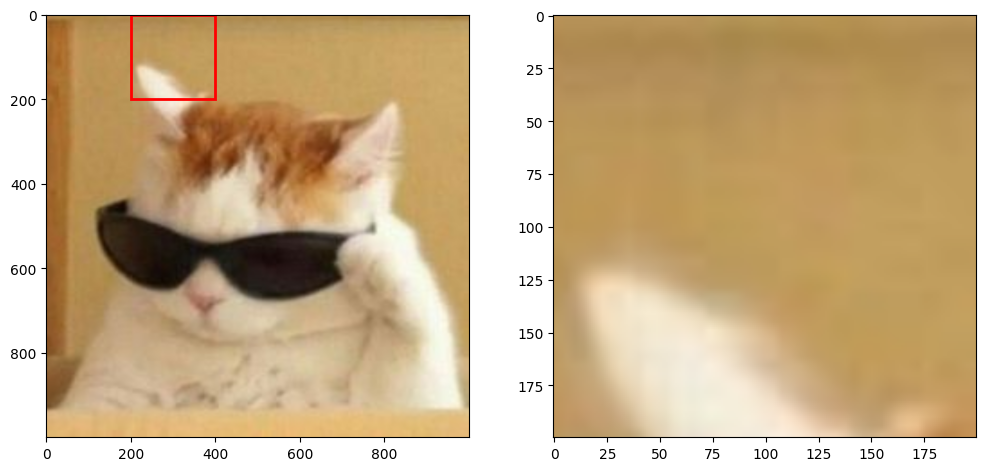

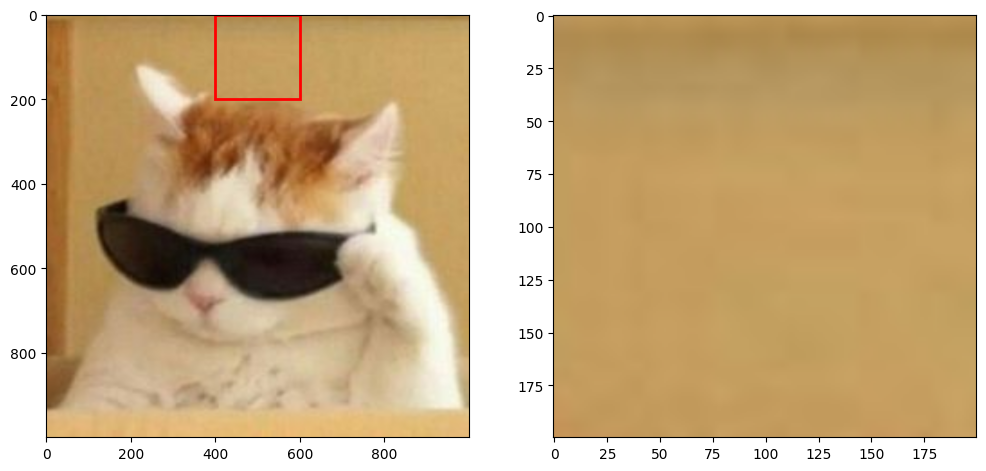

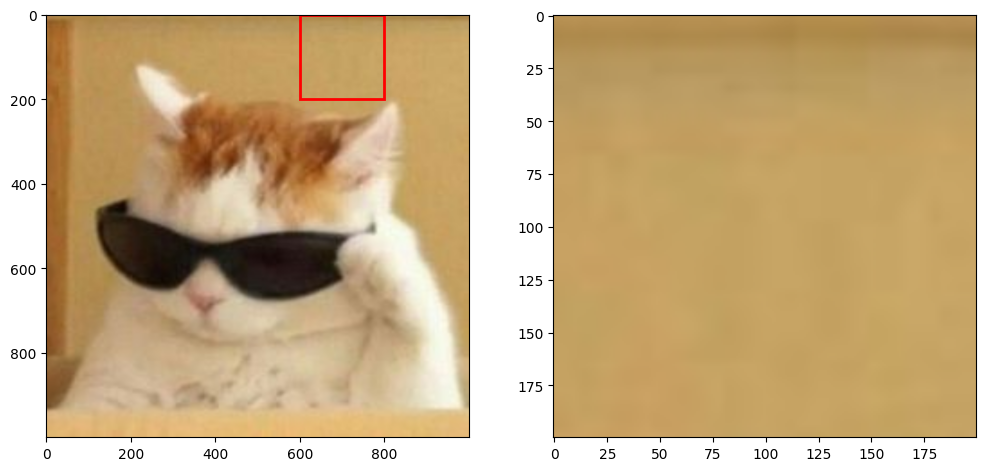

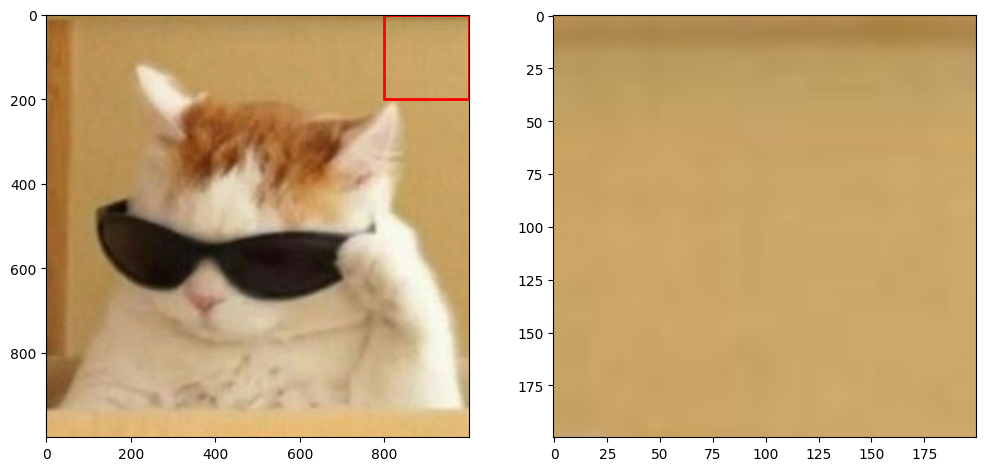

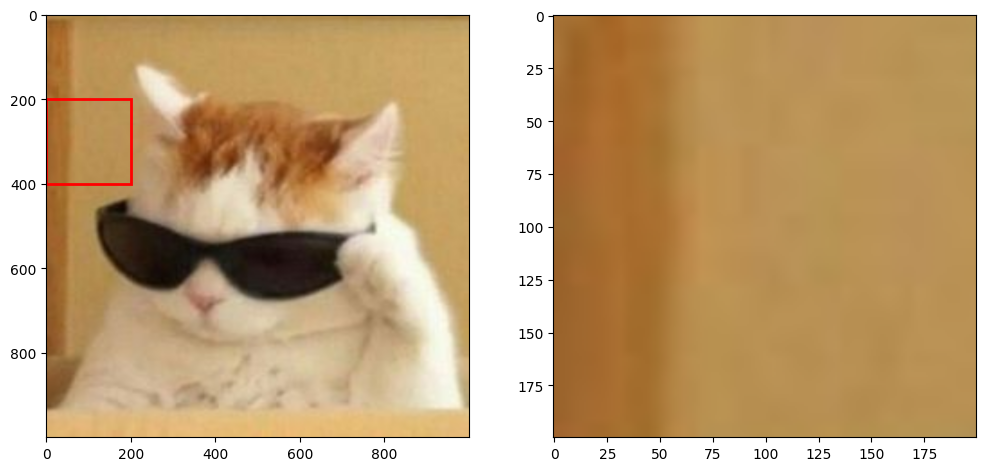

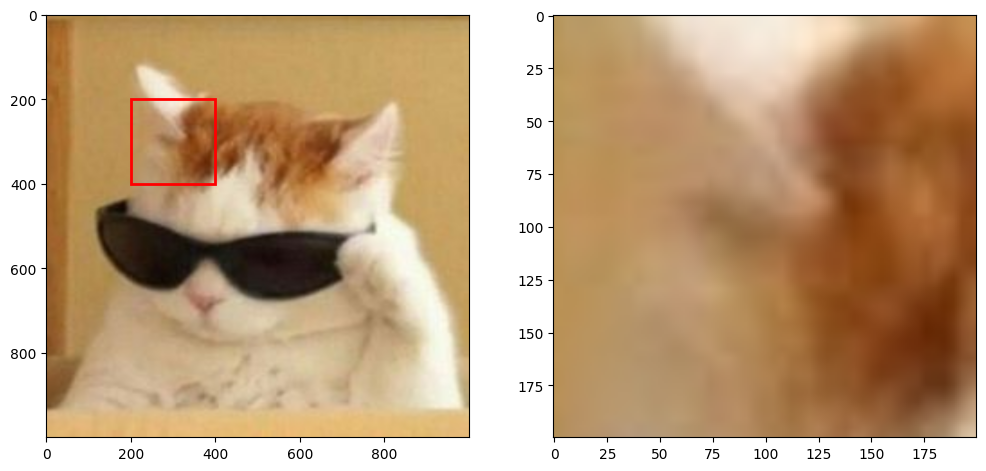

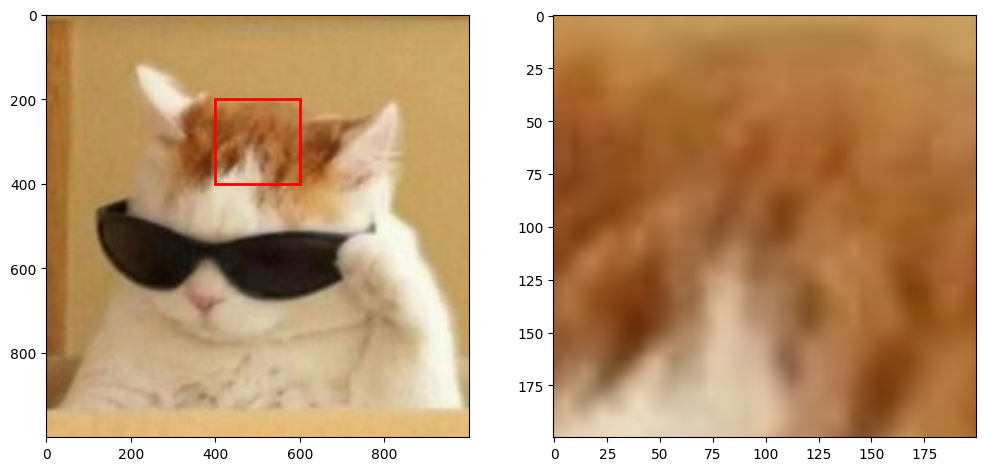

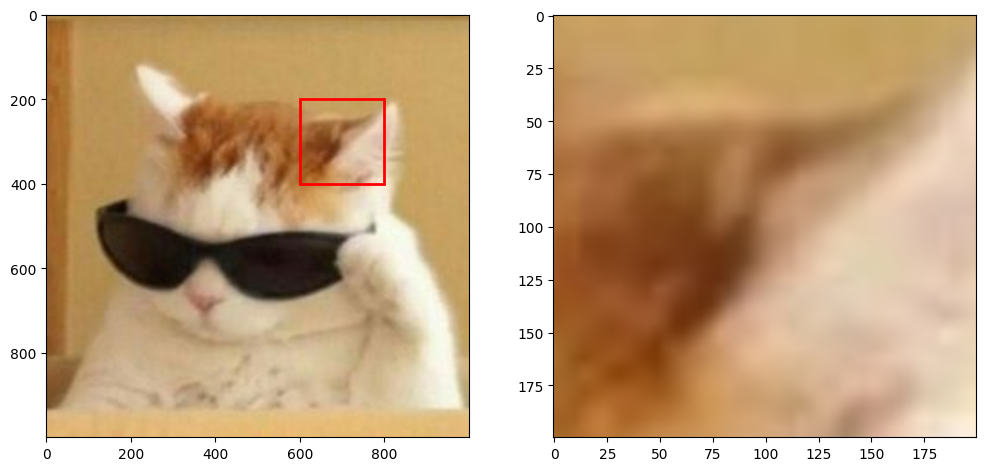

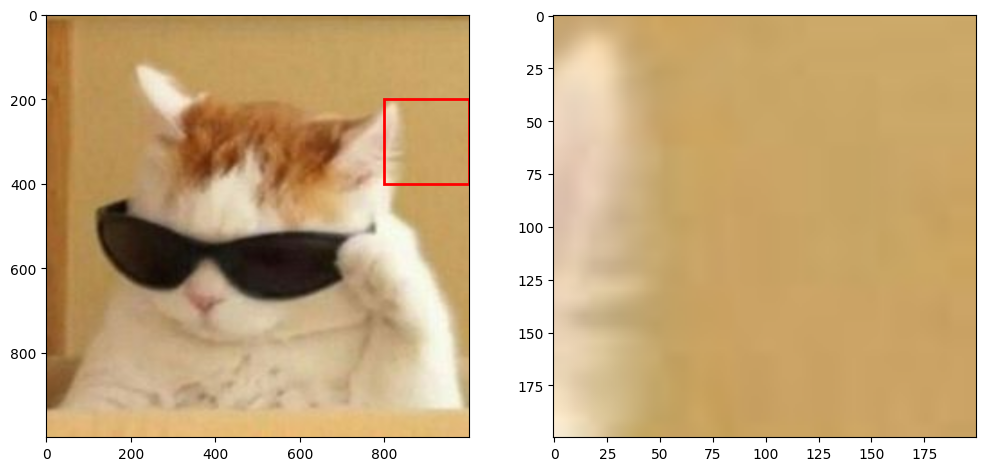

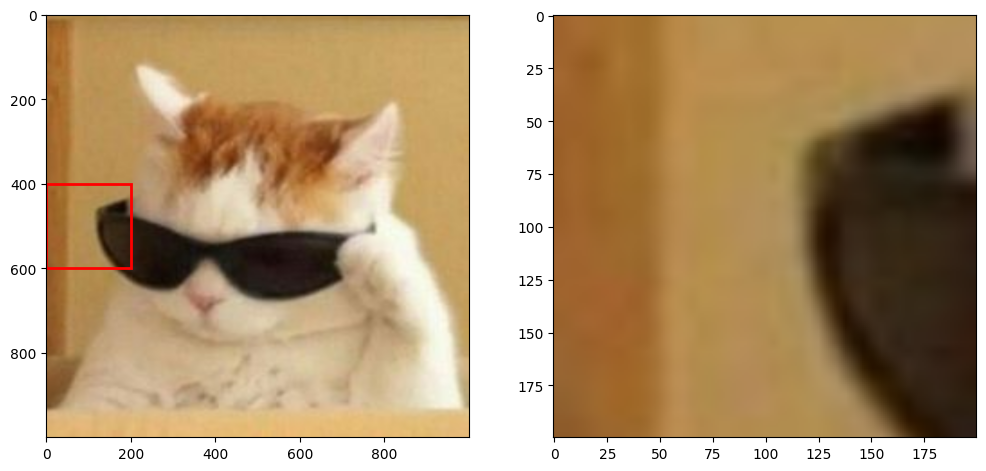

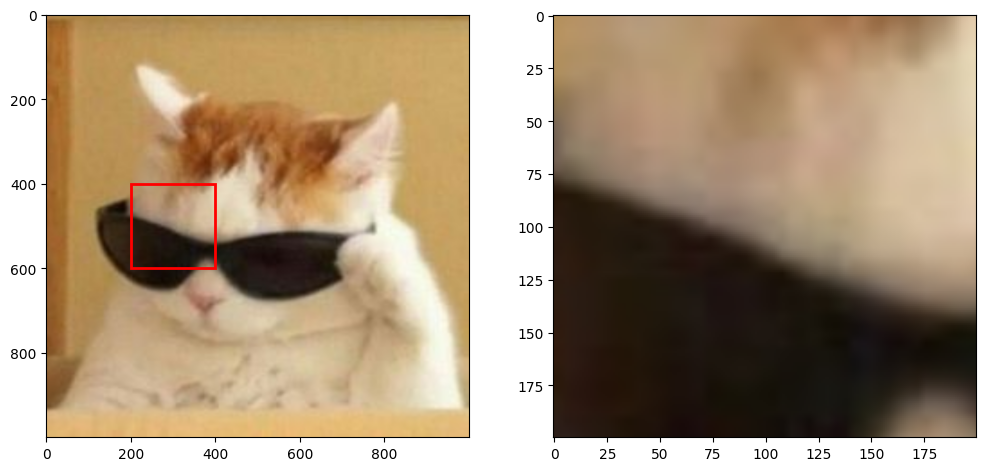

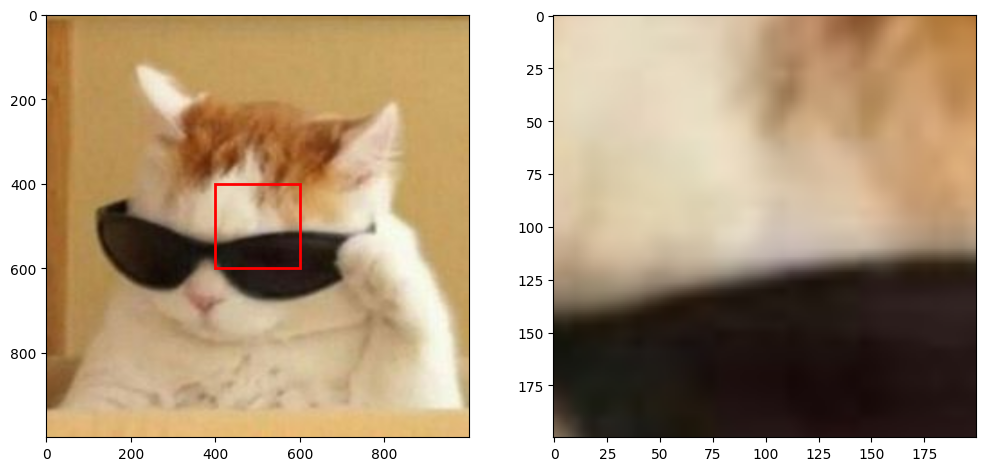

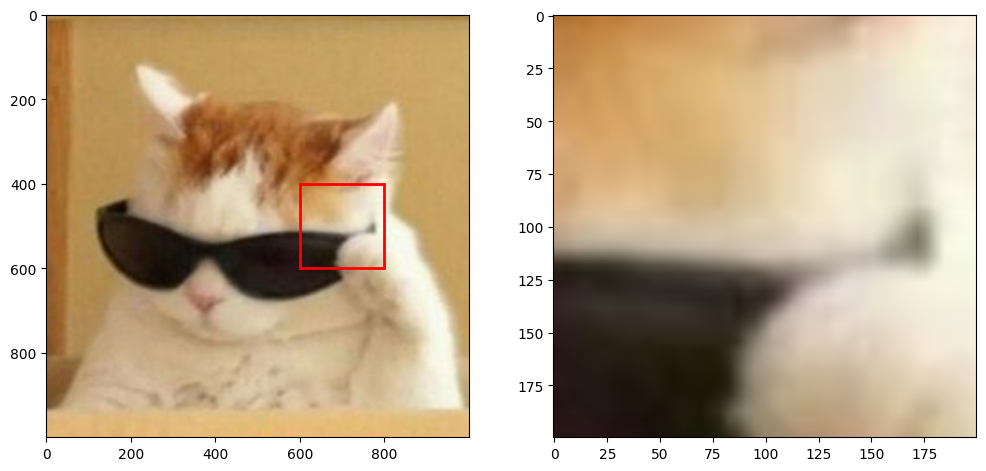

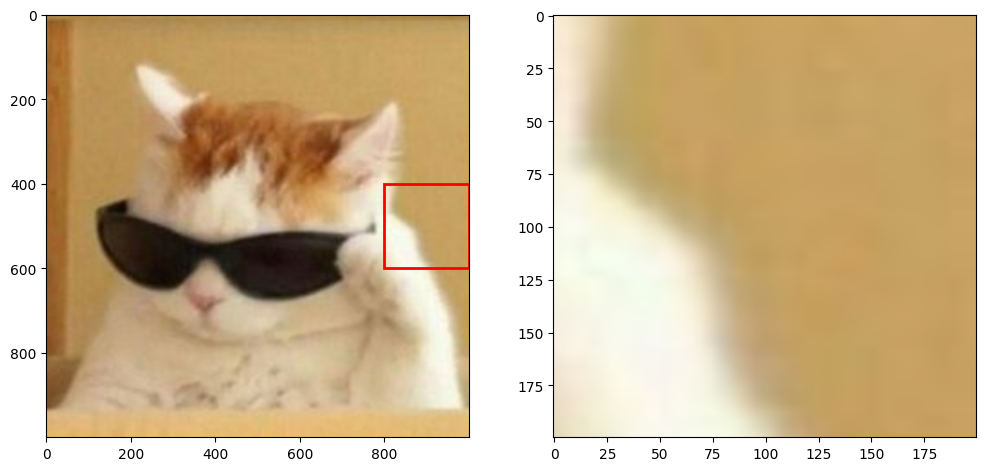

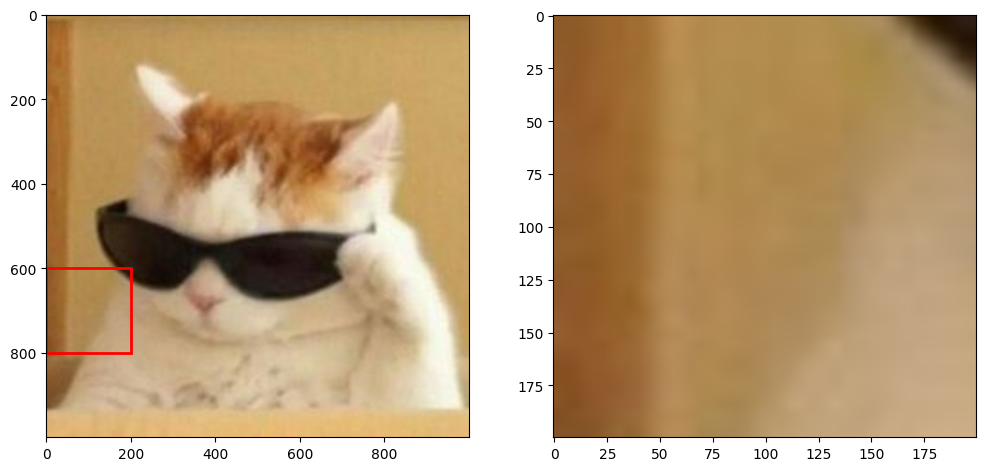

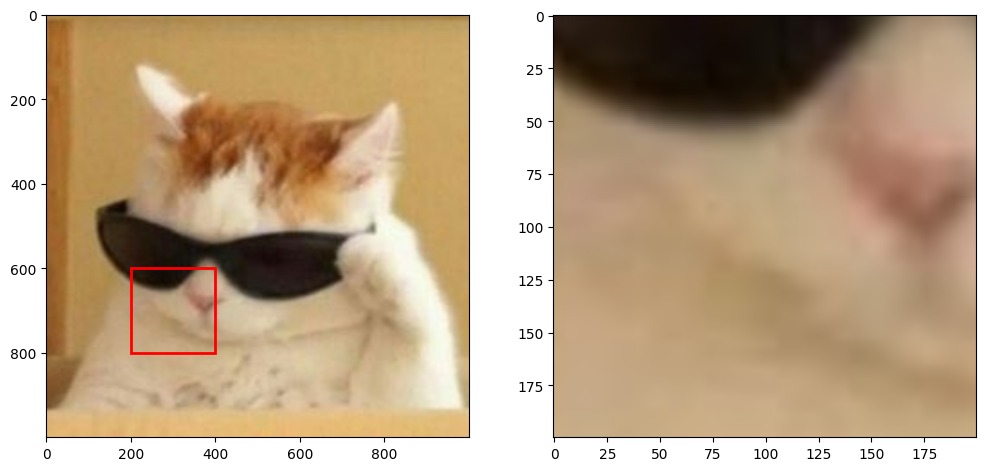

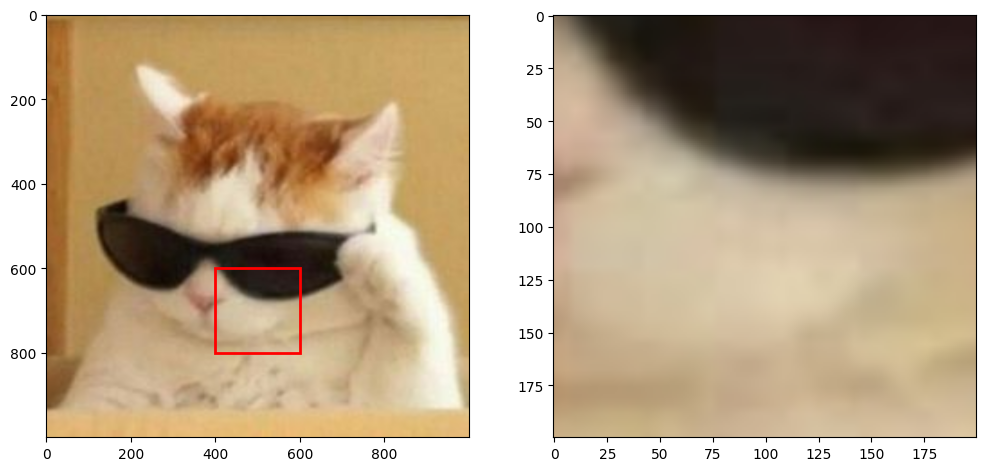

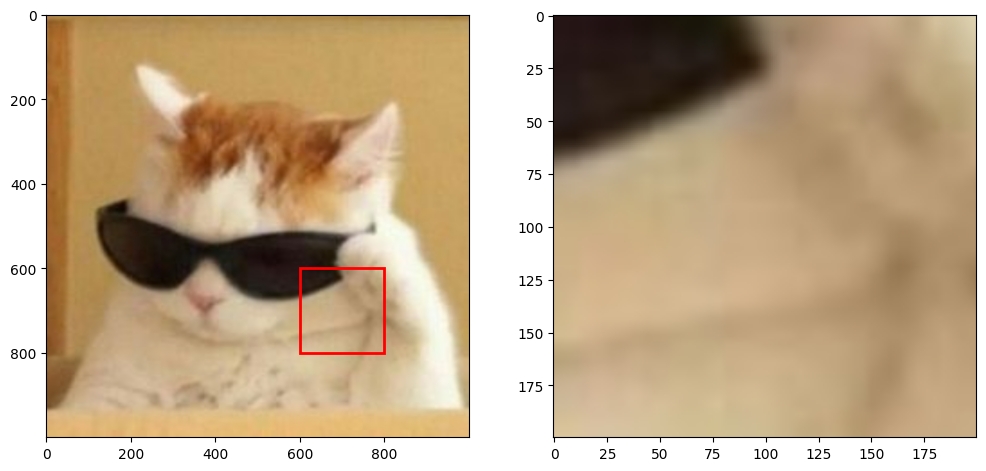

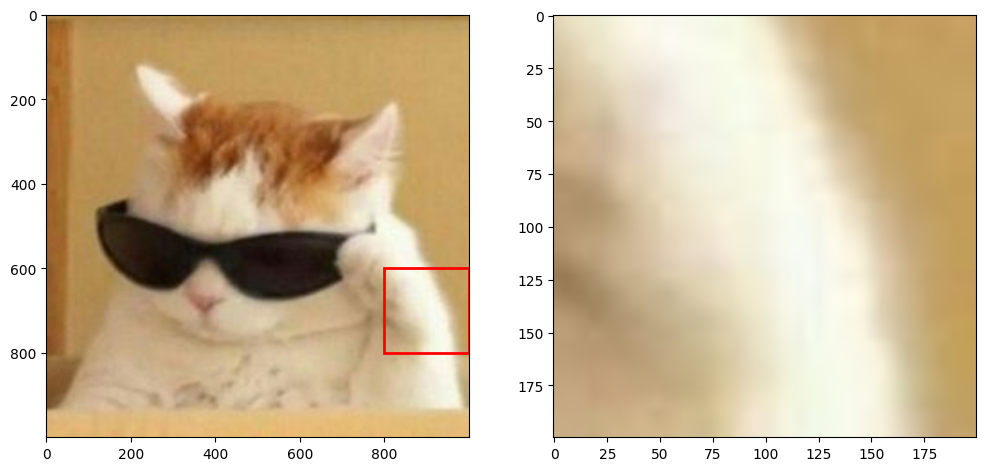

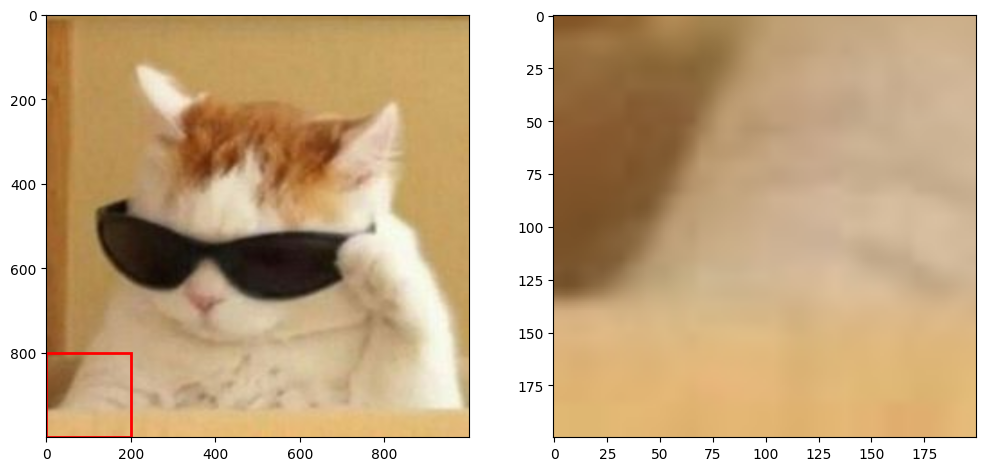

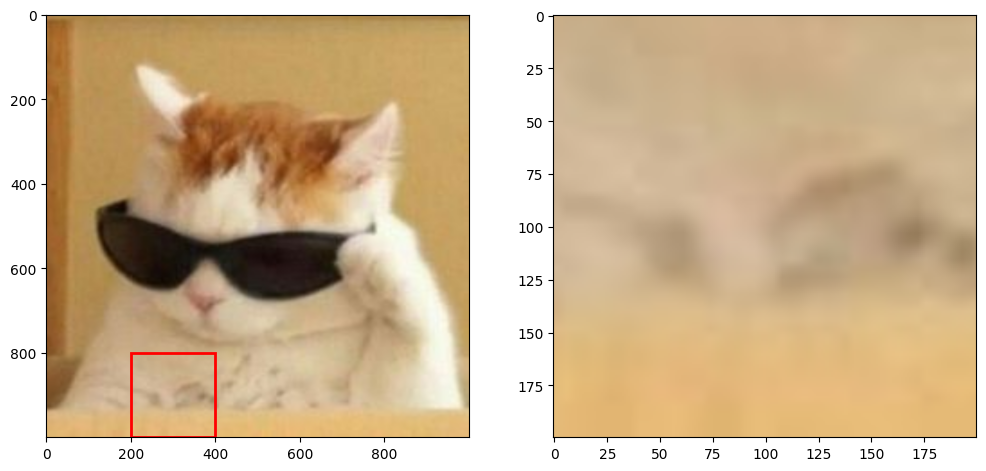

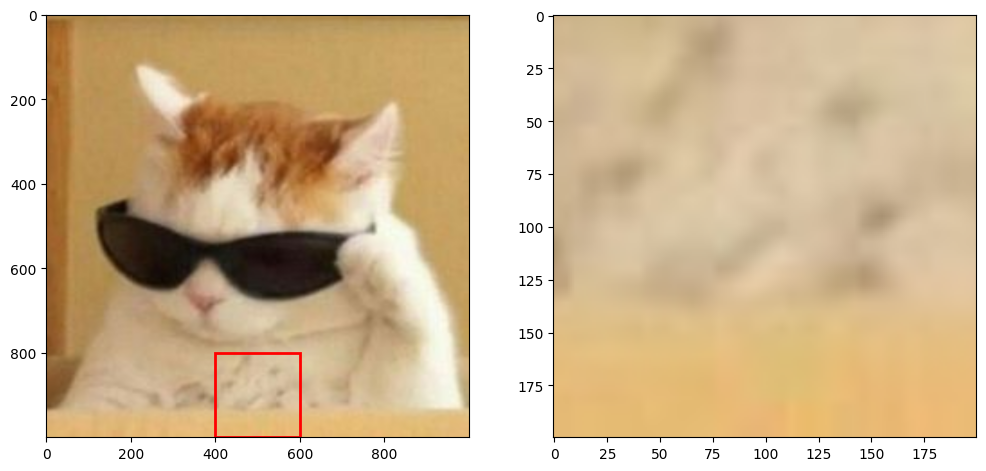

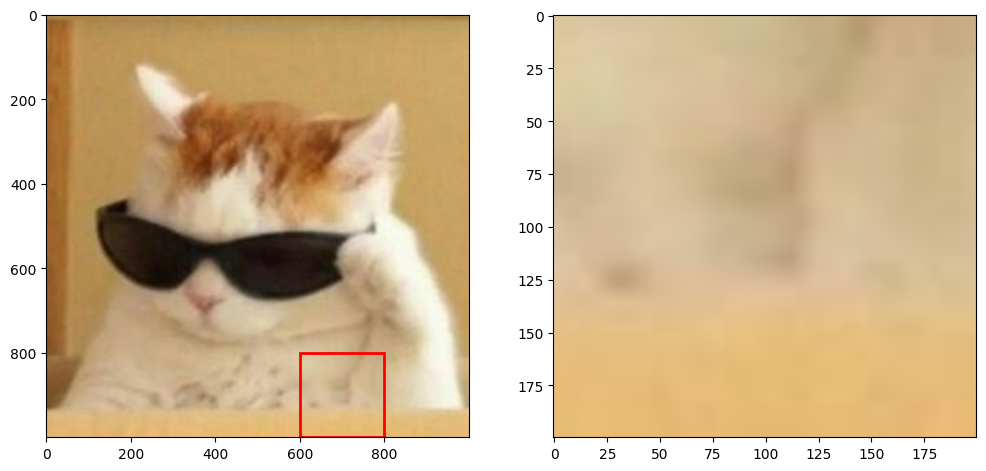

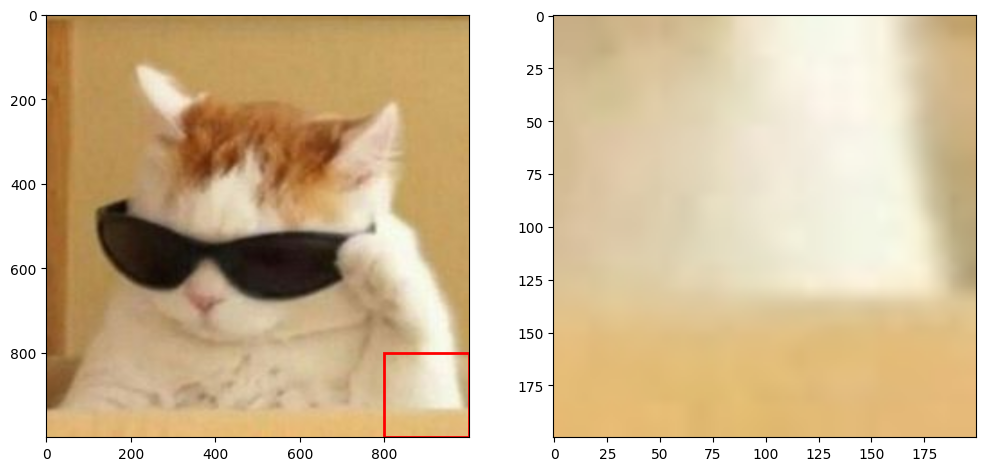

In [7]:
for x, window in enumerate(windows):
  f, axarr = plt.subplots(1, 2, figsize=(12, 12))
  axarr[0].imshow(np_image)                                              #color of the patch    #not fill patch
  rect = patches.Rectangle((window[0], window[1]), 200, 200, linewidth = 2, edgecolor = "r" , facecolor ="none")
  axarr[0].add_patch(rect) #adding the patch, rectangle in the image
  axarr[1].imshow(window[2]) #show where is the patch in the axe 1
  f.savefig("sliding_window/" +str(x) + ".png", dpi=f.dpi ) #saving the images

In [8]:
image_folder = "sliding_window"
video_name = "michi_video.avi"

images = [img for img in os.listdir(image_folder) if img.endswith(".png")] #saving only the images

In [9]:
images = sorted(images, key = lambda x: int(os.path.splitext(x)[0])) 
#sorting the images by text as those was save

In [10]:
frame = cv2.imread(os.path.join(image_folder, images[0]))
#using the first image as the frame

In [11]:
height, width, layer = frame.shape
#frame shape is the size of our image

In [12]:
video = cv2.VideoWriter(video_name, 0, 1, (width, height))
#Generating the video using the size of the frame

In [13]:
for image in images:
  video.write(cv2.imread(os.path.join(image_folder, image)))
video.release()

#writing image per image to generate the video

# Working with object detection metrics

In [14]:
import numpy as np 

In [44]:
## border box determinator
def bb_intersection_over_union(ground_truth_bbox, predicted_bbox):
 xA = max(ground_truth_bbox[0], predicted_bbox[0])
 yA = max(ground_truth_bbox[1], predicted_bbox[1])
 xB = min(ground_truth_bbox[2], predicted_bbox[2])
 yB = min(ground_truth_bbox[3], predicted_bbox[3])

 intersection_area = max(0, xB-xA + 1) * max(0, yB-yA + 1)

 ground_truth_bbox_area = (ground_truth_bbox[2] - ground_truth_bbox[1] + 1) * (ground_truth_bbox[3] - ground_truth_bbox[1] + 1)
 predicted_bbox_area = (predicted_bbox[2] - predicted_bbox[0] + 1) * (predicted_bbox[3] - predicted_bbox[1] + 1)

 iou = intersection_area / float(ground_truth_bbox_area + predicted_bbox_area - intersection_area)

 return iou

In [56]:
image = cv2.imread("/content/drive/MyDrive/Object detection practices/michi.jpg")
image = cv2.resize(image, dsize=(2850, 2850))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [273]:
example = ([670, 330, 900, 550], [670, 330, 900, 550])

In [274]:
iou = bb_intersection_over_union(example[0], example[1])

In [275]:
print(" IoU Value " + str(iou))

 IoU Value 0.404553415061296
